## Flight Passenger Change Analysis
1. Annual passenger number change information
2. Passenger distribution of each month in year

In [1]:
# import necessary tools
import matplotlib as mpl
from matplotlib import pyplot as plt
import seaborn as sns
import numpy as np
%matplotlib inline

In [2]:
# load & prepare data
data = sns.load_dataset("flights")
data.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


([<matplotlib.axis.XTick at 0x1a16b935c0>,
 <a list of 12 Text xticklabel objects>)

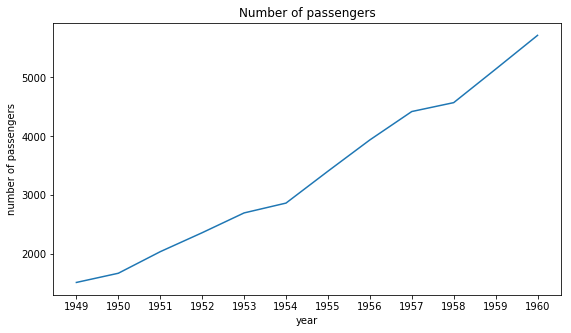

In [4]:
# Annual passenger number change information
year = data.groupby('year').sum()   #divided by year
month = data.groupby('month').sum()  #divided by month
plt.figure(figsize = (20, 5))   #size of the plot
#plt.subplot(1, 2, 1)  #number of plot
plt.plot(year['passengers'])
plt.title('Number of passengers')
plt.xlabel('year')
plt.ylabel('number of passengers')
plt.xticks(year.index)

we can see that customers have increased with the year pass

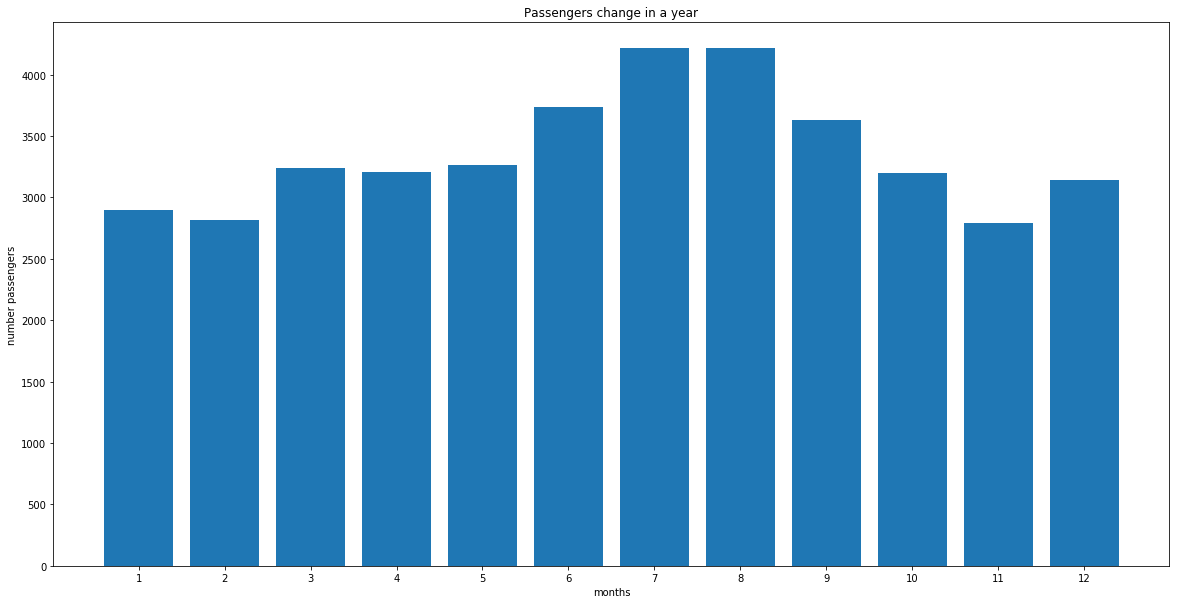

In [7]:
# Passenger distribution of each month in year
#plt.subplot(1, 2, 2)
plt.figure(figsize = (20, 10)) 
x = [i+1 for i in range(len(month['passengers']))]
plt.bar(x, month['passengers'].values) 
plt.xticks(x)
plt.xlabel('months')
plt.ylabel('number passengers')
plt.title('Passengers change in a year')
plt.show()

There are more passengers from June to August，maybe because it is in summer holidays

## Iris analysis
1. Size of sepal and petal 
2. Size of sepal and petal in different species
3. distribution of different species of sepal and petal

In [8]:
# load & prepare data
data = sns.load_dataset('iris')
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


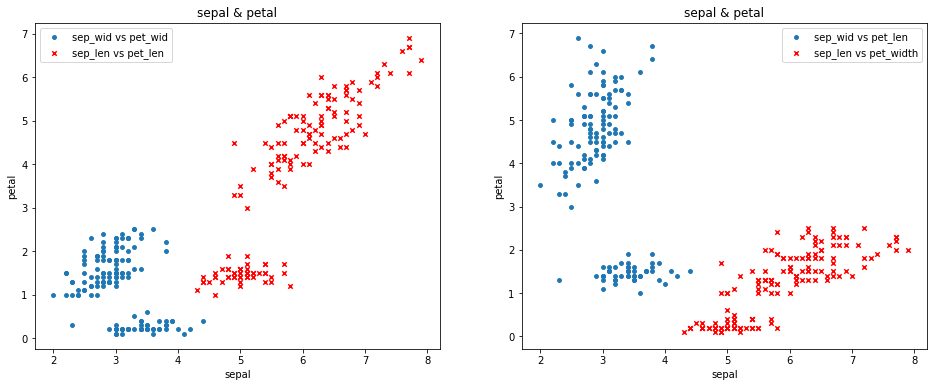

In [9]:
# 1.scatter plot： Size of sepal and petal
# compare width of sepal with width of petal，length of sepal & petal
plt.figure(figsize = (16, 6))
plt.subplot(1, 2, 1)
plt.scatter(data.sepal_width, data.petal_width, s = 15, label = 'sep_wid vs pet_wid')
plt.scatter(data.sepal_length, data.petal_length, s = 20, c = 'r', marker = 'x',
             label = 'sep_len vs pet_len')
plt.xlabel('sepal')
plt.ylabel('petal')
plt.title('sepal & petal')
plt.legend(loc = 'upper left')

# compare width of sepal with length of petal，length of sepal with width of petal
plt.subplot(1, 2, 2)
plt.scatter(data.sepal_width, data.petal_length, s = 15, label = 'sep_wid vs pet_len')
plt.scatter(data.sepal_length, data.petal_width, s = 20, c = 'r', marker = 'x',
             label = 'sep_len vs pet_width')
plt.xlabel('sepal')
plt.ylabel('petal')
plt.title('sepal & petal')
plt.legend(loc = 'upper right')
plt.show()

In [10]:
# count species
data.species.value_counts()

virginica     50
setosa        50
versicolor    50
Name: species, dtype: int64

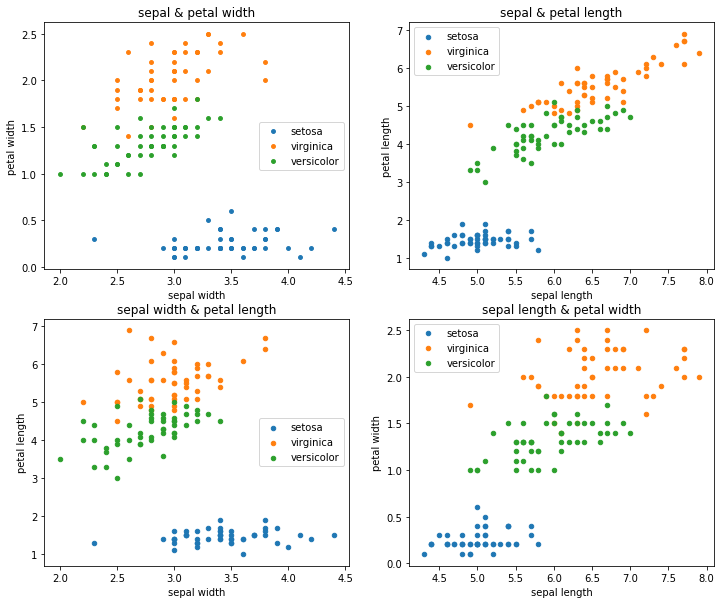

In [11]:
# 2.classified scatter plot：size of sepal & petal in different species 
# divided by species
species_dict = dict(list(data.groupby('species')))
# species_dict['setosa'].sepal_length

# relationship between width of sepal and petal
plt.figure(figsize = (12, 10))
plt.subplot(2, 2, 1)
plt.scatter(species_dict['setosa'].sepal_width, species_dict['setosa'].petal_width, s = 15, label = 'setosa')
plt.scatter(species_dict['virginica'].sepal_width, species_dict['virginica'].petal_width, s = 15, label = 'virginica')
plt.scatter(species_dict['versicolor'].sepal_width, species_dict['versicolor'].petal_width, s = 15, label = 'versicolor')
plt.xlabel('sepal width')
plt.ylabel('petal width')
plt.title('sepal & petal width')
plt.legend(loc = 'best')


# relationship between length of sepal and petal
plt.subplot(2, 2, 2)
plt.scatter(species_dict['setosa'].sepal_length, species_dict['setosa'].petal_length, s =20, 
            #c = 'r',
             label = 'setosa')
plt.scatter(species_dict['virginica'].sepal_length, species_dict['virginica'].petal_length, s = 20, 
            #c = 'blue', marker = 'x',
             label = 'virginica')
plt.scatter(species_dict['versicolor'].sepal_length, species_dict['versicolor'].petal_length, s = 20, 
            #c = 'green', marker = 'd',
             label = 'versicolor')
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.title('sepal & petal length')
plt.legend(loc = 'best')


# relationship between width of sepal and length of petal
plt.subplot(2, 2, 3)
plt.scatter(species_dict['setosa'].sepal_width, species_dict['setosa'].petal_length, s = 20, 
            label = 'setosa')
plt.scatter(species_dict['virginica'].sepal_width, species_dict['virginica'].petal_length, s = 20,  
            label = 'virginica')
plt.scatter(species_dict['versicolor'].sepal_width, species_dict['versicolor'].petal_length, s = 20, #c = 'green', marker = 's',
            label = 'versicolor')
plt.xlabel('sepal width')
plt.ylabel('petal length')
plt.title('sepal width & petal length')
plt.legend(loc = 'best')


# relationship between length of sepal and width of petal
plt.subplot(2, 2, 4)
plt.scatter(species_dict['setosa'].sepal_length, species_dict['setosa'].petal_width, s = 20, #c = 'red',
             label = 'setosa')
plt.scatter(species_dict['virginica'].sepal_length, species_dict['virginica'].petal_width, s = 20, #c = 'blue', marker = 'x',
             label = 'virginica')
plt.scatter(species_dict['versicolor'].sepal_length, species_dict['versicolor'].petal_width, s = 20,# c = 'green', marker = 's',
             label = 'versicolor')
plt.xlabel('sepal length')
plt.ylabel('petal width')
plt.title('sepal length & petal width')
plt.legend(loc = 'best')
plt.show()

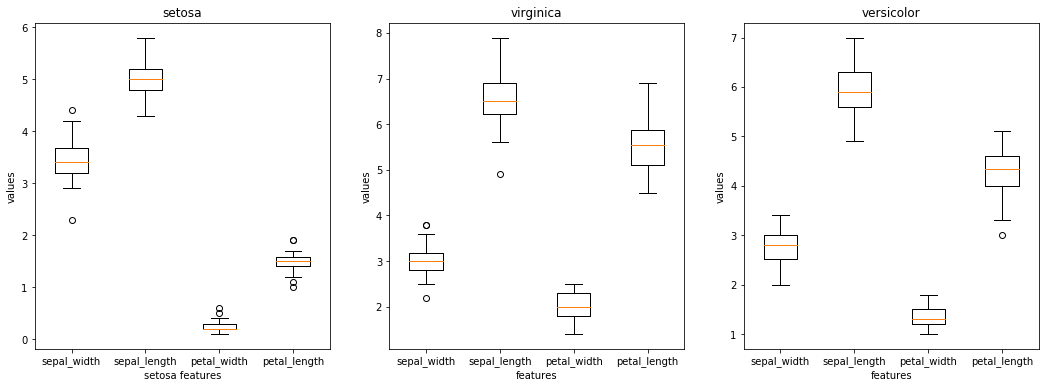

In [12]:
# 3. boxplot：distribution of different species of sepal and petal
setosa_sw = species_dict['setosa'].sepal_width
setosa_sl = species_dict['setosa'].sepal_length
setosa_pw = species_dict['setosa'].petal_width
setosa_pl = species_dict['setosa'].petal_length

# setosa
setosa = [setosa_sw, setosa_sl, setosa_pw, setosa_pl]
plt.figure(figsize = (18, 6))
plt.subplot(1, 3, 1)
plt.boxplot(setosa, labels = ['sepal_width', 'sepal_length', 'petal_width', 'petal_length'])
plt.xlabel('setosa features')
plt.ylabel('values')
plt.title('setosa')

# virginica
plt.subplot(1, 3, 2)
plt.boxplot([species_dict['virginica'].sepal_width, species_dict['virginica'].sepal_length, 
            species_dict['virginica'].petal_width, species_dict['virginica'].petal_length],
            labels = ['sepal_width', 'sepal_length', 'petal_width', 'petal_length'])
plt.xlabel('features')
plt.ylabel('values')
plt.title('virginica')

# versicolor
plt.subplot(1, 3, 3)
plt.boxplot([species_dict['versicolor'].sepal_width, species_dict['versicolor'].sepal_length, 
            species_dict['versicolor'].petal_width, species_dict['versicolor'].petal_length],
            labels = ['sepal_width', 'sepal_length', 'petal_width', 'petal_length'])
plt.xlabel('features')
plt.ylabel('values')
plt.title('versicolor')
plt.show()

## Analysis of tips in resturant
1. Relationship between tips and total bill
2. Male customers and female customers, who are more generous
3. Whether or not smoking will have an impact on the amount of tips
4. On weekdays and weekends, when customers give their tips more generous
5. When customers are more willing to tip for lunch and dinner
6. Whether the number of meals will have an impact on the generosity
7. The combination of gender and smoking impact on the generous 

In [13]:
#load and prepare data
data = sns.load_dataset('tips')
data.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


Text(0.5,1,'tips & total_bill')

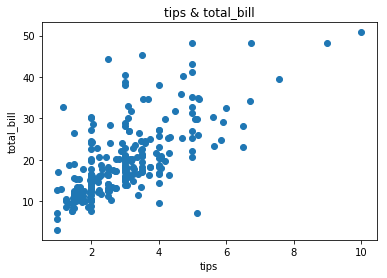

In [14]:
# 1.Scatter：Relationship between tips and total bill
plt.scatter(data.tip, data.total_bill)
plt.xlabel('tips')
plt.ylabel('total_bill')
plt.title('tips & total_bill')

/Users/hankaei/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0.5,1,'tips with different sex')

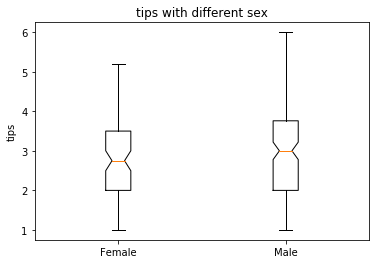

In [15]:
# 2.box plot：Male customers and female customers, who are more generous
tips_f = data[data.sex == 'Female'].tip
tips_m = data[data.sex == 'Male'].tip

plt.boxplot([tips_f, tips_m], 1, '', labels = ['Female', 'Male'])
#plt.xlabel('sex')
plt.ylabel('tips')
plt.title('tips with different sex')

/Users/hankaei/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0.5,1,'tips between whether smoking')

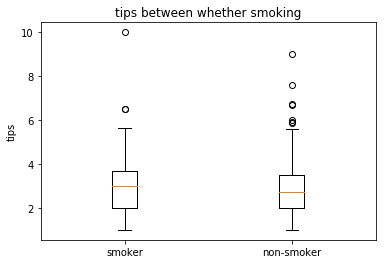

In [16]:
# 3.box plot：Whether or not smoking will have an impact on the amount of tips
smoker_y = data[data.smoker == 'Yes'].tip
smoker_n = data[data.smoker == 'No'].tip

plt.boxplot([smoker_y, smoker_n], labels = ['smoker','non-smoker'])
plt.ylabel('tips')
plt.title('tips between whether smoking')

In [17]:
# count work days
data.day.value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

Text(0.5,1,'tips between weekday & weekend')

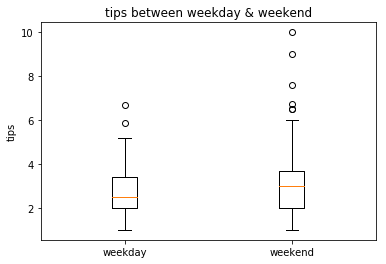

In [18]:
# 4.classified box plot： On weekdays and weekends, when customers give their tips more generous
import numpy as np
weekday = [data[data.day == 'Thur'].tip, data[data.day == 'Fri'].tip]
weekend = [data[data.day == 'Sat'].tip, data[data.day == 'Sun'].tip]
day = np.concatenate([np.array(weekday[0]), np.array(weekday[1])])
end = np.concatenate([np.array(weekend[0]), np.array(weekend[1])])
plt.boxplot([day, end], labels = ['weekday', 'weekend'])
plt.ylabel('tips')
plt.title('tips between weekday & weekend')

/Users/hankaei/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0.5,1,'tips between lunch & dinner')

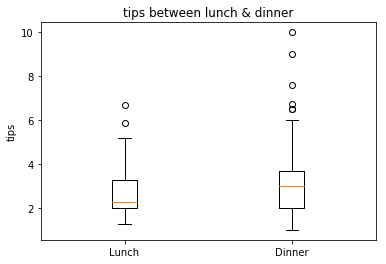

In [19]:
# 5.classified box plot：When customers are more willing to tip for lunch and dinner
plt.boxplot([data[data.time == 'Lunch'].tip, data[data.time == 'Dinner'].tip], labels = ['Lunch', 'Dinner'])
plt.ylabel('tips')
plt.title('tips between lunch & dinner')

/Users/hankaei/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0.5,1,'tips & size')

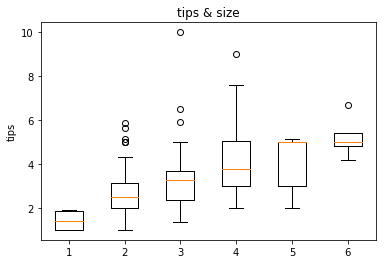

In [20]:
# 6.classified box plot：Whether the number of meals will have an impact on the generosity
#size = dict(list(data.groupby('size')))
plt.boxplot([data[data['size'] == 1].tip, data[data['size'] == 2].tip, 
            data[data['size'] == 3].tip, data[data['size'] == 4].tip,
            data[data['size'] == 5].tip, data[data['size'] == 6].tip])
plt.ylabel('tips')
plt.title('tips & size')

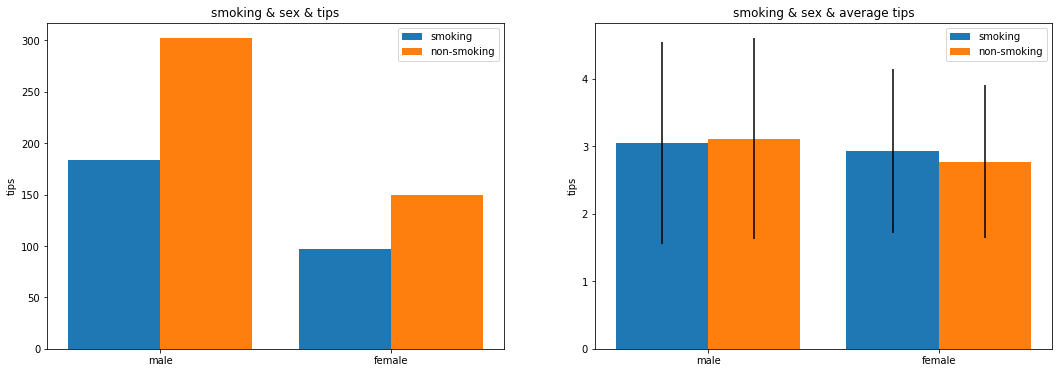

In [21]:
# 7.The combination of gender and smoking impact on the generous
smoke = data.groupby(['sex','smoker'])#.agg('size')

# calculate the sum，average and median of tips of smoker and non-smoker in different sex
sex_smoker_groups={}
sex_smoker_tips_sum={}
sex_smoker_tips_mean={}
sex_smoker_tips_std={}
for name,group in smoke:
    # print([group.values])  
    sex_smoker_groups[name] = group
    sex_smoker_tips_sum[name] = sex_smoker_groups[name].tip.sum()
    sex_smoker_tips_mean[name] = sex_smoker_groups[name].tip.mean()
    sex_smoker_tips_std[name] = sex_smoker_groups[name].tip.std()
    
# relationship between different six and whether or not smoking with total tips
x = np.arange(2)  
total_width, n = 0.8, 2  
width = total_width / n 
x = x - (total_width - width) / 2  

plt.figure(figsize = (18, 6))
plt.subplot(1, 2, 1)
plt.bar(x, [sex_smoker_tips_sum['Male','Yes'],sex_smoker_tips_sum['Female','Yes']], width = width)
plt.bar(x+width, [sex_smoker_tips_sum['Male','No'],sex_smoker_tips_sum['Female','No']], width = width)
plt.legend(['smoking', 'non-smoking'])  #set label
plt.ylabel('tips')
plt.xticks(x+width/2, ('male', 'female')) #x axis
plt.title('smoking & sex & tips')
#[smoke_male,smoke_female], [nonsmoke_male,nonsmoke_female]

# average tips
plt.subplot(1, 2, 2)
plt.bar(x, [sex_smoker_tips_mean['Male', 'Yes'],sex_smoker_tips_mean['Female', 'Yes']], width = width,
        yerr = [sex_smoker_tips_std['Male', 'Yes'],sex_smoker_tips_std['Female', 'Yes']])
plt.bar(x+width, [sex_smoker_tips_mean['Male', 'No'],sex_smoker_tips_mean['Female', 'No']], width = width,
        yerr = [sex_smoker_tips_std['Male', 'No'],sex_smoker_tips_std['Female', 'No']])
plt.legend(['smoking', 'non-smoking'])
plt.ylabel('tips')
plt.xticks(x+width/2, ('male', 'female'))
plt.title('smoking & sex & average tips')
plt.show()

## Survival of Titanic analysis
1. Proportion of Passengers survived and victims in different class
2. The proportion of survivors of different genders
3. Fare distribution for survived and victims
4. Age distribution of survivors and victims
5. Passenger positions at different port of embarked town
6. Distribution of cousins number of Survival and victims 
7. Distribution of parents and children of Survival and victims 
8. Relationship between survival and alone

In [22]:
data = sns.load_dataset('titanic')
data.head()

,survived,pclass,sex,age,sibsp,parch,fare,embarked,class,who,adult_male,deck,embark_town,alive,alone
0,0,3,male,22.0,1,0,7.2500,S,Third,man,True,NaN,Southampton,no,False
1,1,1,female,38.0,1,0,71.2833,C,First,woman,False,C,Cherbourg,yes,False
2,1,3,female,26.0,0,0,7.9250,S,Third,woman,False,NaN,Southampton,yes,True
3,1,1,female,35.0,1,0,53.1000,S,First,woman,False,C,Southampton,yes,False
4,0,3,male,35.0,0,0,8.0500,S,Third,man,True,NaN,Southampton,no,True


In [23]:
data.shape

(891, 15)

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 15 columns):
survived       891 non-null int64
pclass         891 non-null int64
sex            891 non-null object
age            714 non-null float64
sibsp          891 non-null int64
parch          891 non-null int64
fare           891 non-null float64
embarked       889 non-null object
class          891 non-null category
who            891 non-null object
adult_male     891 non-null bool
deck           203 non-null category
embark_town    889 non-null object
alive          891 non-null object
alone          891 non-null bool
dtypes: bool(2), category(2), float64(2), int64(4), object(5)
memory usage: 80.6+ KB


In [25]:
# count class number
data.pclass.value_counts()
#data.pclass.value_counts(sort = False).index.values

3    491
1    216
2    184
Name: pclass, dtype: int64

In [26]:
# difine stacked histogram
def stackedbarplot(x, y_data_list, y_data_names, y_label, x_label, title):
    _, ax = plt.subplots()
    # plot iteratively
    for i in range(0, len(y_data_list)):
        if i == 0:
            ax.bar(x, y_data_list[i], #colors = colors[i], 
                  align = 'center', label = y_data_names[i])
        else:
            ax.bar(x, y_data_list[i], #colors = color[i], 
                bottom = y_data_list[i-1], align = 'center', label = y_data_names[i])
    ax.set_ylabel(y_label)
    ax.set_xlabel(x_label)
    ax.set_title(title)
    ax.legend(loc = 'upper right')

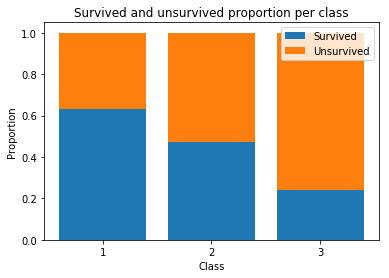

In [28]:
# 1.stacked histogram：Proportion of Passengers survived and victims in different class
c1_surv = data[(data['pclass'] == 1) & (data['survived'] == 1)].survived.sum()
c1_surv_prop = c1_surv / data[(data['pclass'] == 1)].pclass.sum()        
c2_surv = data[(data['pclass'] == 2) & (data['survived'] == 1)].survived.sum()
c2_surv_prop = c2_surv / (data[(data['pclass'] == 2)].pclass.sum()/2) 
c3_surv = data[(data['pclass'] == 3) & (data['survived'] == 1)].survived.sum()
c3_surv_prop = c3_surv / (data[(data['pclass'] == 3)].pclass.sum()/3) 
    
stackedbarplot(x = ['1', '2', '3'], 
              y_data_list = [[c1_surv_prop,c2_surv_prop,c3_surv_prop], [(1-c1_surv_prop),(1-c2_surv_prop),(1-c3_surv_prop)]],
              y_data_names = ['Survived', 'Unsurvived'],
              y_label = 'Proportion',
              x_label = 'Class',
              title = 'Survived and unsurvived proportion per class')

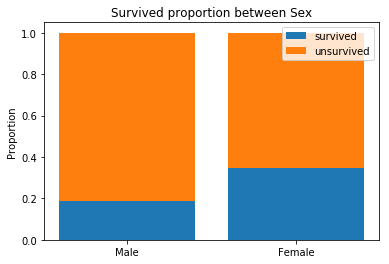

In [29]:
# 2.stacked histogram：The proportion of survivors of different genders
male = data[(data.sex == 'male') & (data.survived == 1)].survived.sum()
male_surv_prop = male / (data.sex.value_counts()['male'])
female = data[(data.sex == 'female') & (data.survived == 1)].survived.sum()
female_surv_prop = male / (data.sex.value_counts()['female'])

plt.bar([0,1],[male_surv_prop,female_surv_prop])
plt.bar([0,1],[1-male_surv_prop,1-female_surv_prop], bottom=[male_surv_prop,female_surv_prop],
       tick_label = ['Male', 'Female'])
plt.ylabel('Proportion')
plt.title('Survived proportion between Sex')
plt.legend(['survived','unsurvived'])
plt.show()

/Users/hankaei/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0.5,1,'Proportion of Fare between survived & unsurvived')

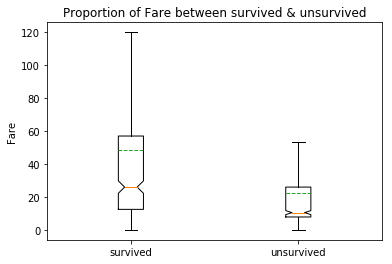

In [30]:
# 3.classified box plot：Fare distribution for survived and victims
plt.boxplot([data[data.survived == 1].fare, data[data.survived == 0].fare],
           notch = True, showmeans = True, meanline = True, showfliers = False)
plt.xticks([1,2],['survived', 'unsurvived'])
plt.ylabel('Fare')
plt.title('Proportion of Fare between survived & unsurvived')

/Users/hankaei/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0.5,1,'Proportion of age between survived & unsurvived')

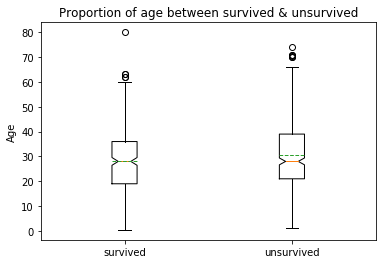

In [31]:
# 4.classified box plot：Age distribution of survivors and victims
plt.boxplot([data[data.survived == 1].age.dropna(axis=0,how='all'), 
             data[data.survived == 0].age.dropna(axis = 0, how = 'all')],
            notch = True, showmeans = True, meanline = True,
            labels = ['survived', 'unsurvived'])
plt.ylabel('Age')
plt.title('Proportion of age between survived & unsurvived')

In [32]:
data.embarked.value_counts()

S    644
C    168
Q     77
Name: embarked, dtype: int64

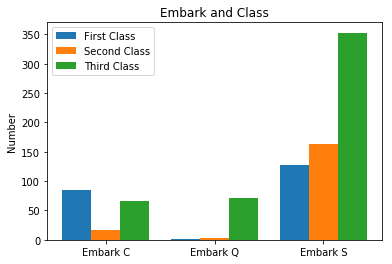

In [33]:
# 5.classified histogram：Passenger positions at different port of embarked town
em_c = data.groupby(['embarked','pclass']).agg('size')

x = np.arange(3)  
total_width, n = 0.8, 3  
width = total_width / n 
x = x - (total_width - width) / 2  

plt.bar(x, [em_c['C',1],em_c['Q',1],em_c['S',1]], width = width)
plt.bar(x+width, [em_c['C',2],em_c['Q',2],em_c['S',2]], width = width)
plt.bar(x+2*width, [em_c['C',3],em_c['Q',3],em_c['S',3]], width = width)
plt.ylabel('Number')
plt.xticks(x+width, ('Embark C', 'Embark Q', 'Embark S')) 
plt.title('Embark and Class')
plt.legend(['First Class','Second Class','Third Class'])

/Users/hankaei/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0.5,1,'Number brothers & sisters of survived and unsurvived')

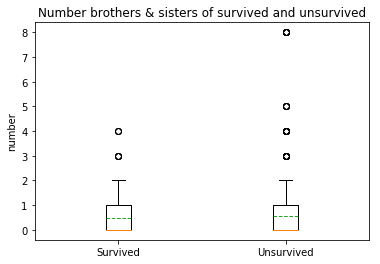

In [34]:
# 6.classified box plot：Distribution of cousins number of Survival and victims
plt.boxplot([data[data.survived == 1].sibsp, data[data.survived == 0].sibsp],
           showmeans = True, meanline = True,
            labels = ['Survived', 'Unsurvived'])
plt.ylabel('number')
plt.title('Number brothers & sisters of survived and unsurvived')

/Users/hankaei/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


Text(0.5,1,'Number of parents & children of survived and unsurvived')

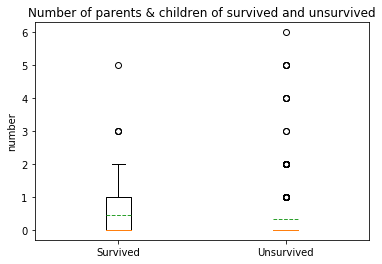

In [35]:
# 7.classified box plot：Distribution of parents and children of Survival and victims
plt.boxplot([data[data.survived == 1].parch, data[data.survived == 0].parch],
           showmeans = True, meanline = True,
            labels = ['Survived', 'Unsurvived'])
plt.ylabel('number')
plt.title('Number of parents & children of survived and unsurvived')

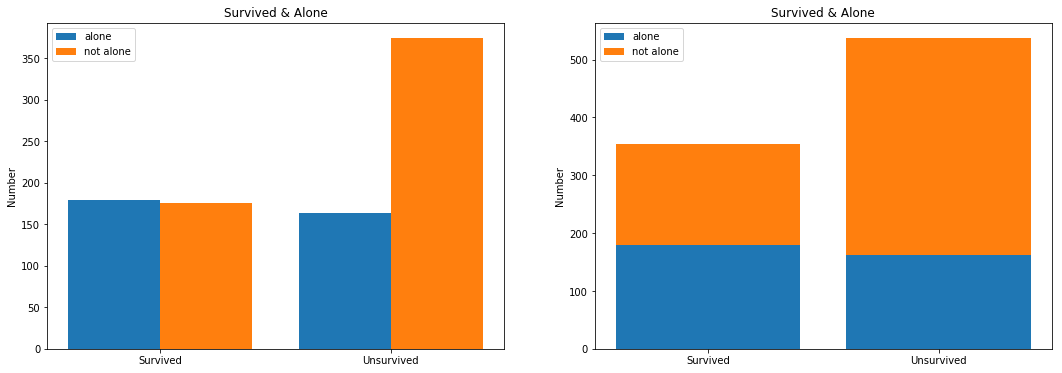

In [36]:
# 8.classified histogram：Relationship between survival and alone
alone_surv = data.groupby(['alone', 'survived']).agg('size')

x = np.arange(2)  
total_width, n = 0.8, 2  
width = total_width / n 
x = x - (total_width - width) / 2  

plt.figure(figsize = (18,6))
plt.subplot(1, 2, 1)
plt.bar(x, [alone_surv[0,1],alone_surv[1,1]], width = width)
plt.bar(x+width, [alone_surv[0,0],alone_surv[1,0]], width = width)
plt.ylabel('Number')
plt.xticks(x+width/2, ('Survived', 'Unsurvived')) 
plt.title('Survived & Alone')
plt.legend(['alone','not alone'])

plt.subplot(1, 2, 2)
plt.bar(x,[alone_surv[0,1],alone_surv[1,1]])
plt.bar(x,[alone_surv[0,0],alone_surv[1,0]], bottom=[alone_surv[0,1],alone_surv[1,1]],
       tick_label = ['Survived', 'Unsurvived'])
plt.ylabel('Number')
plt.title('Survived & Alone')
plt.legend(['alone','not alone'])
plt.show()